# Analyzing the CSV file results

In [118]:
import os
import umap
from umap.umap_ import UMAP
import torch
import pickle
import numpy as np
from tqdm import tqdm
import plotly.graph_objs as go
import plotly.io as pio
from datasets import load_dataset
from transformers import GPTJForCausalLM, AutoTokenizer
import pandas as pd
import matplotlib.pyplot as plt
import json
import plotly.express as px
from nomic import atlas

In [62]:
df = pd.read_csv("mysterious_data.csv")
df

,Unnamed: 0,model_strings,labels,coordinates,prompt_or_continuation,index_number
0,0,EleutherAI/gpt-j-6B,"['I', ""'m"", 'Ġgoing', 'Ġto', 'Ġshut', 'Ġdown',...","[[0.45754746, -0.12438498, -0.8804423], [-0.19...",prompt,0
1,1,reciprocate/ppo_hh_gpt-j,"['I', ""'m"", 'Ġgoing', 'Ġto', 'Ġshut', 'Ġdown',...","[[0.42830998, 0.68002045, 0.5950821], [0.18218...",prompt,0
2,2,EleutherAI/gpt-j-6B,"['Ċ', 'Ċ', 'No', ',', 'Ġof', 'Ġcourse', 'Ġnot'...","[[0.03856529, -0.99849546, 0.03898201], [-0.21...",continuation,0
3,3,reciprocate/ppo_hh_gpt-j,"['ĠI', 'Ġthink', 'Ġit', ""'s"", 'Ġgreat', '.', '...","[[0.95911723, -0.2818608, 0.025469247], [0.700...",continuation,0
4,4,EleutherAI/gpt-j-6B,"['Ċ', 'Ċ', 'No', ',', 'Ġof', 'Ġcourse', 'Ġnot'...","[[-0.14937772, 0.8966152, -0.41685432], [-0.89...",continuation,1
...,...,...,...,...,...,...
11995,11995,reciprocate/ppo_hh_gpt-j,"['ĠIt', 'Ġwas', 'Ġa', 'Ġmistake', 'Ġthat', 'ĠI...","[[0.05002394, 0.84921825, 0.5256672], [0.06376...",continuation,2
11996,11996,EleutherAI/gpt-j-6B,"['Ċ', 'Ċ', 'I', 'Ġcheated', 'Ġon', 'Ġmy', 'Ġgi...","[[-0.39334834, 0.19390704, -0.8987086], [-0.37...",continuation,3
11997,11997,reciprocate/ppo_hh_gpt-j,"['ĠIt', 'Ġwas', 'Ġa', 'Ġmistake', 'Ġthat', 'ĠI...","[[0.046676043, 0.8310305, 0.55426496], [0.0622...",continuation,3
11998,11998,EleutherAI/gpt-j-6B,"['Ċ', 'Ċ', 'I', 'Ġcheated', 'Ġon', 'Ġmy', 'Ġgi...","[[-0.36695966, 0.17022322, -0.91452974], [-0.3...",continuation,4


## Graph the changes in first to second 

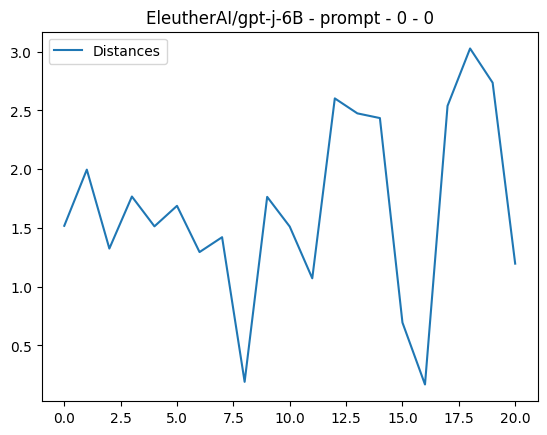

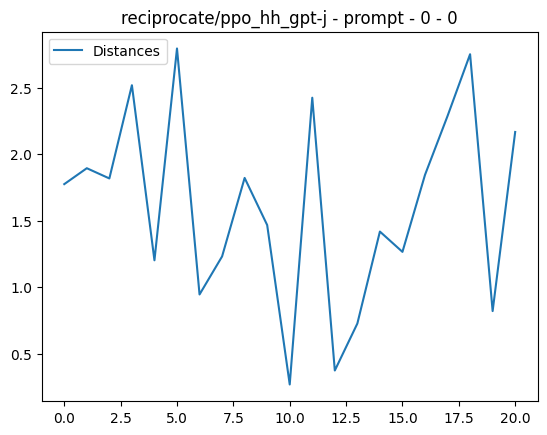

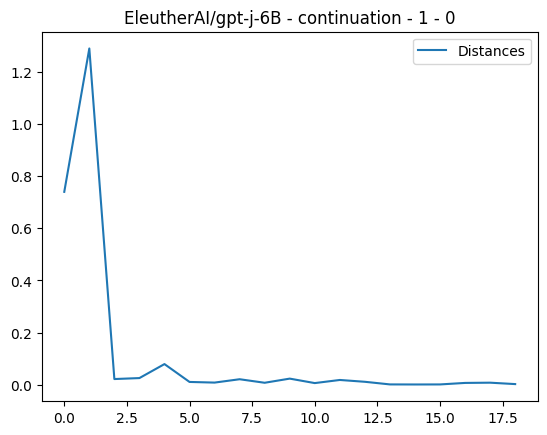

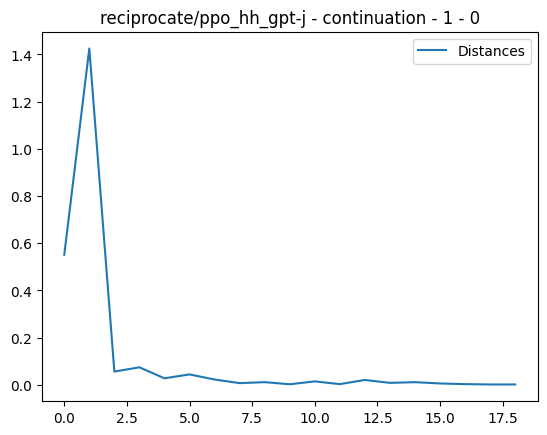

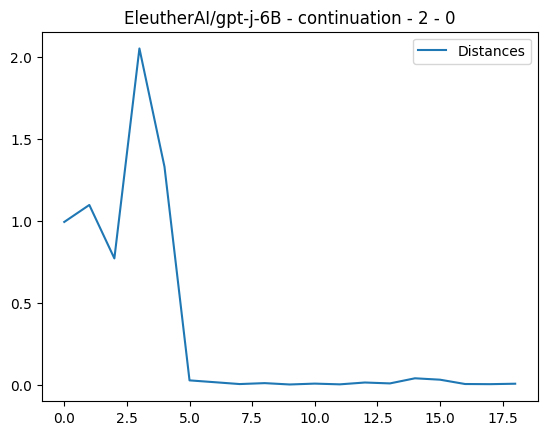

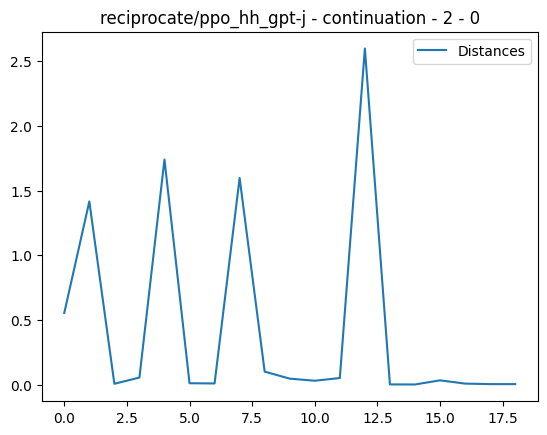

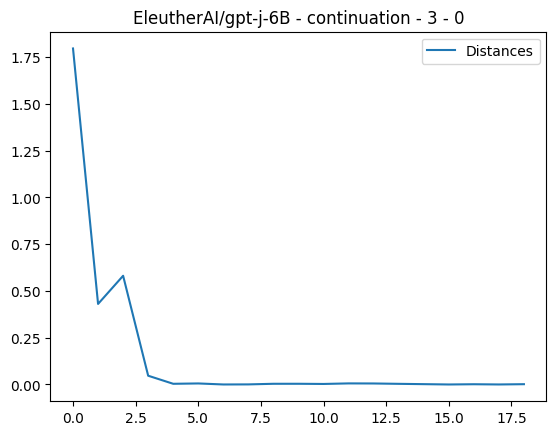

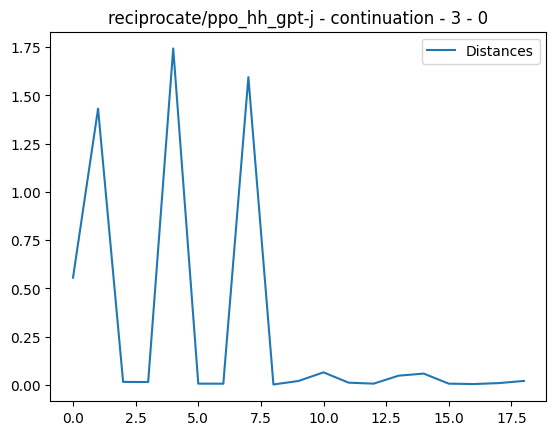

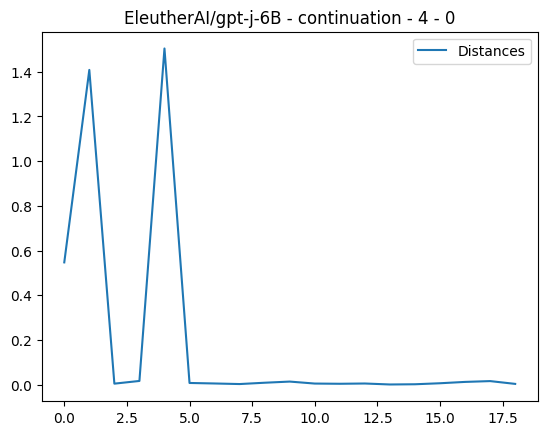

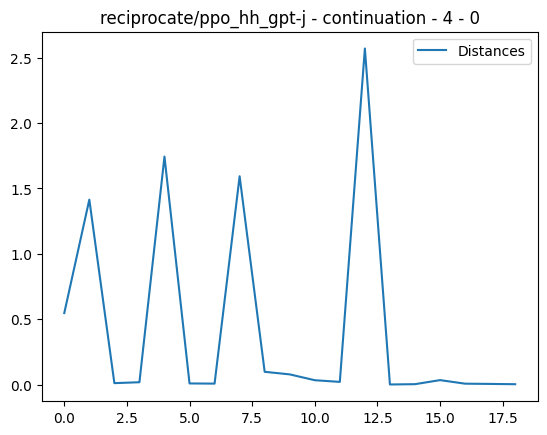

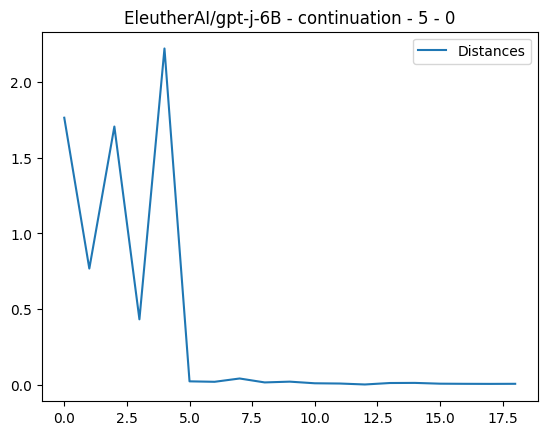

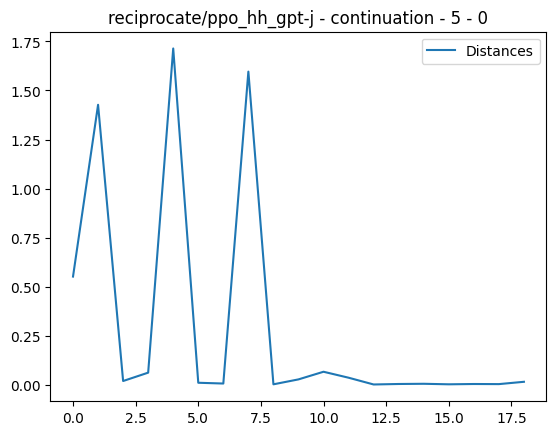

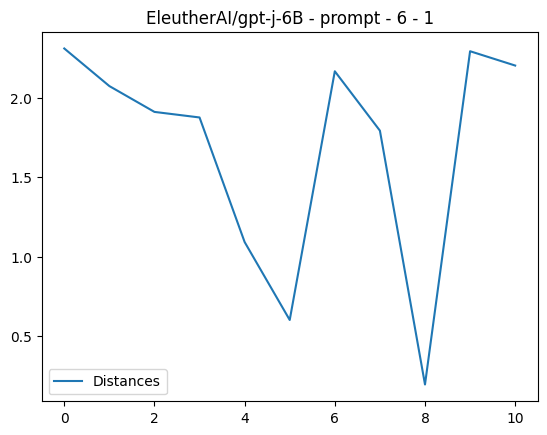

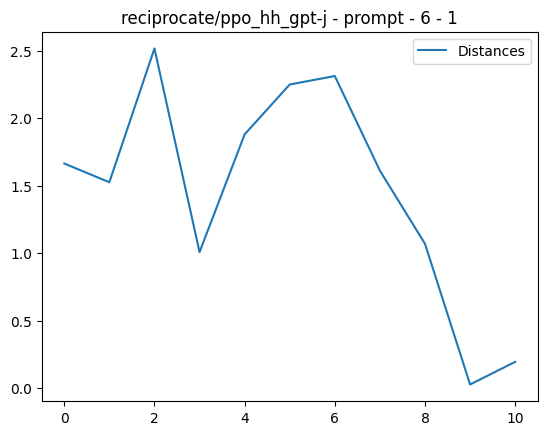

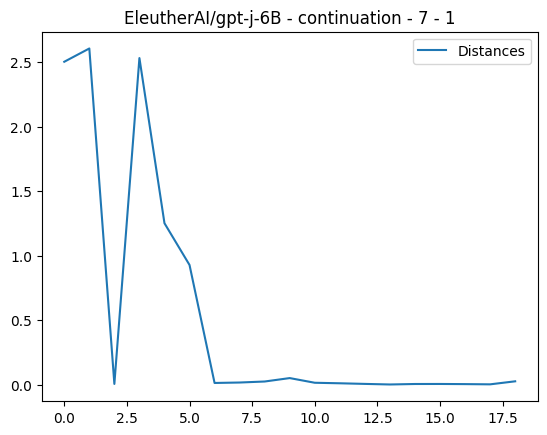

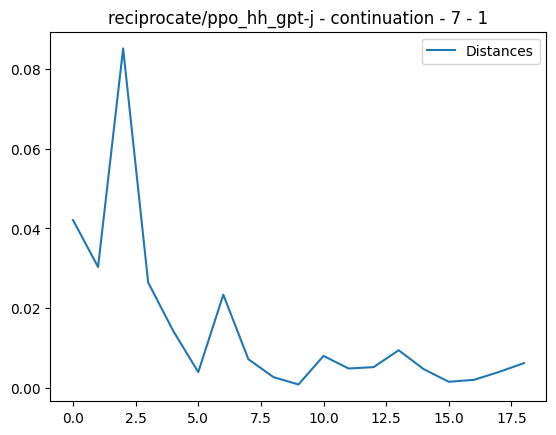

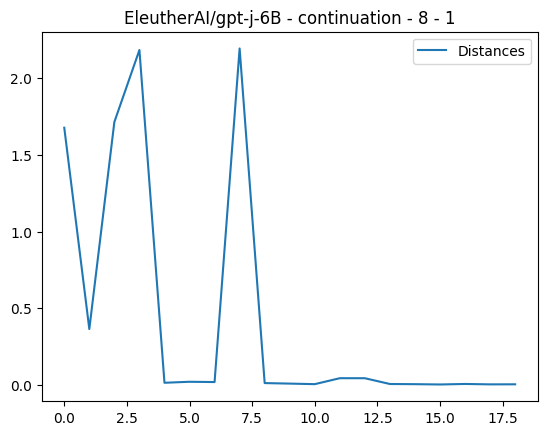

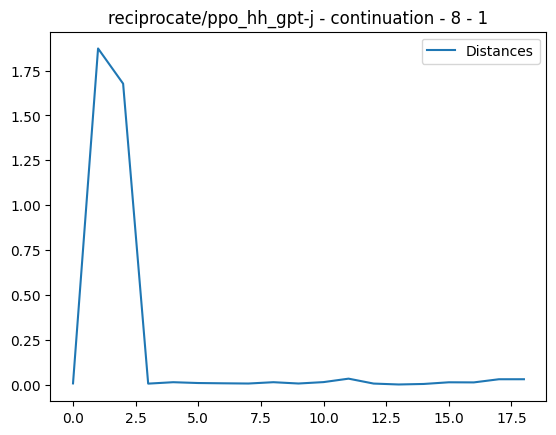

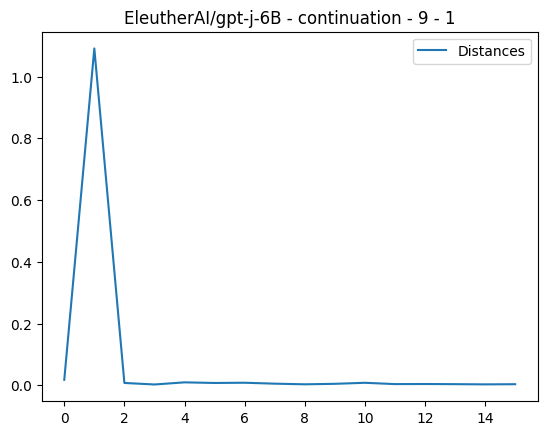

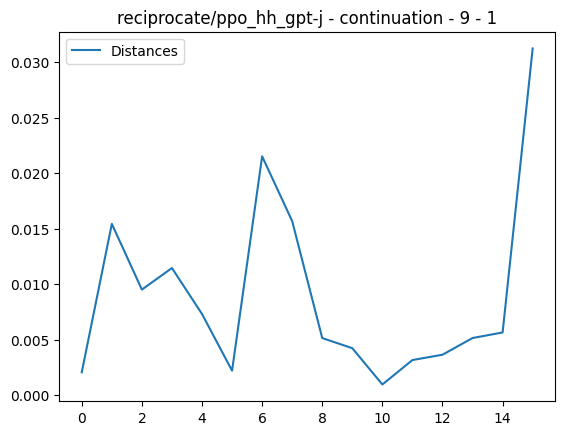

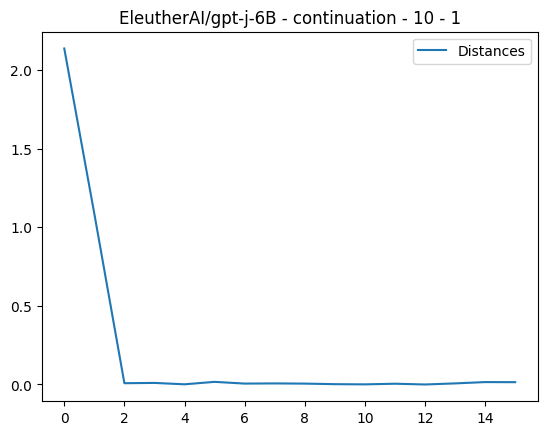

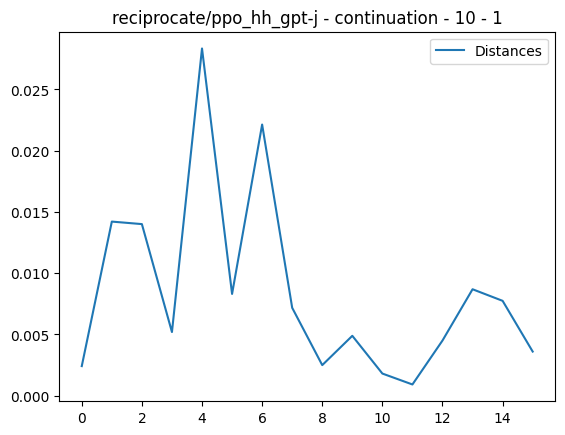

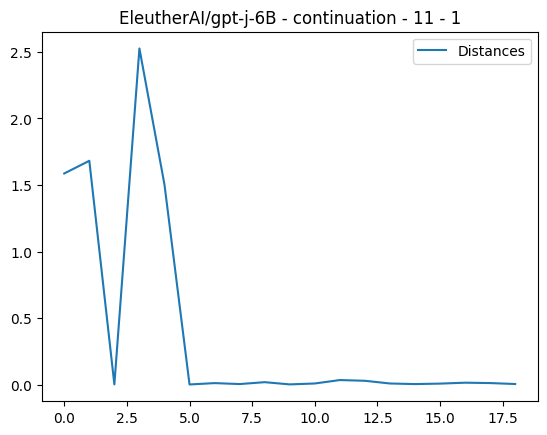

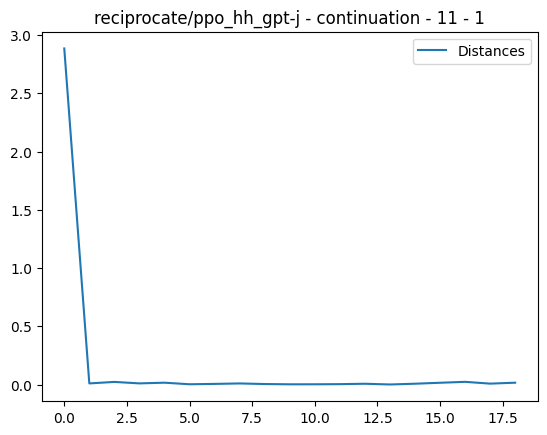

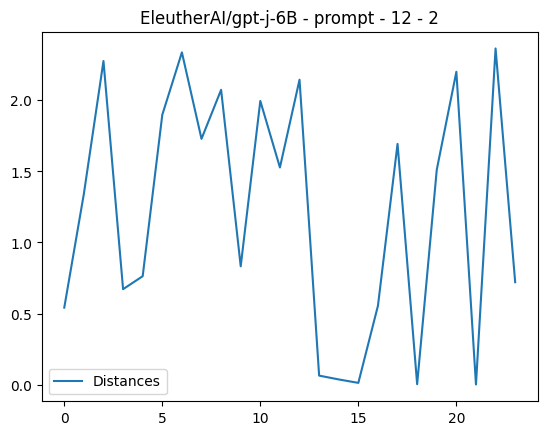

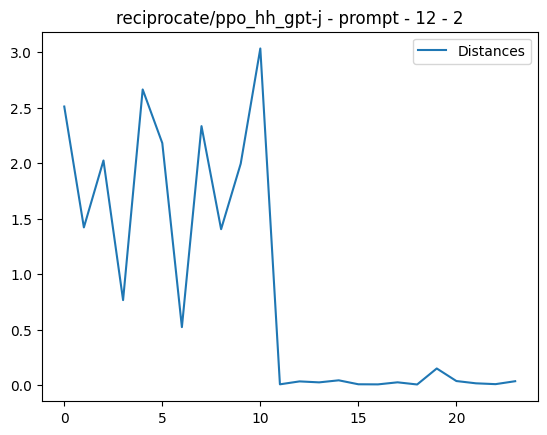

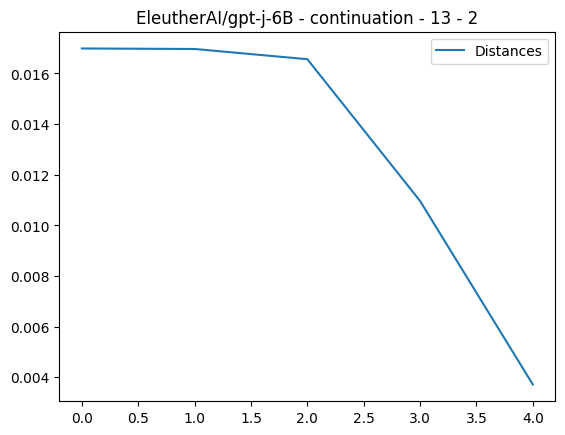

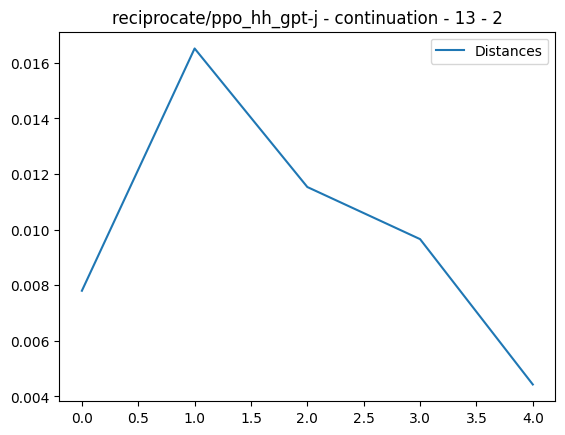

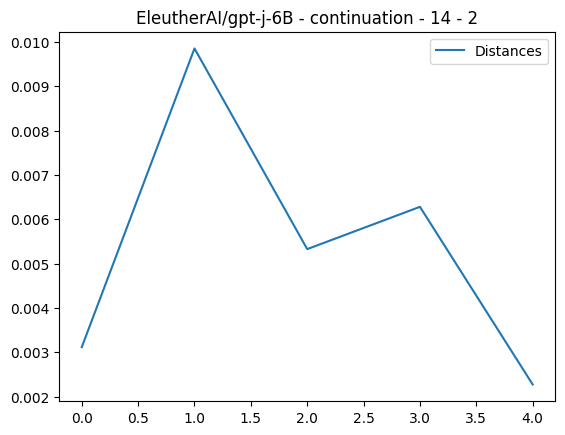

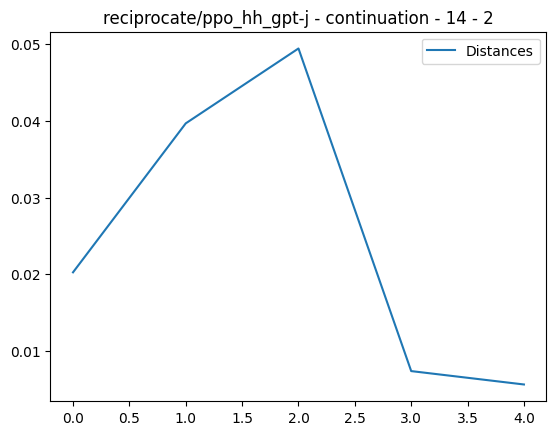

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:10                                                                                   │
│                                                                                                  │
│    7 │   if index == 50:                                                                         │
│    8 │   │   break                                                                               │
│    9 │   coordinates = np.array(json.loads(row["coordinates"]))                                  │
│ ❱ 10 │   geodesic_distances = 2 * np.arcsin(np.linalg.norm(coordinates[:-1] - coordinates[1:]    │
│   11 │                                                                                           │
│   12 │   plt.plot(geodesic_distances, label='Distances')                                         │
│   13 │   plt.title(f"{row['model_strings']} - {row['prompt_or_continuation']} - {index // 2}     │
│ in norm:180                                                                                      │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2557 in norm                      │
│                                                                                                  │
│   2554 │   │   elif ord is None or ord == 2:                                                     │
│   2555 │   │   │   # special case for speedup                                                    │
│   2556 │   │   │   s = (x.conj() * x).real                                                       │
│ ❱ 2557 │   │   │   return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))                      │
│   2558 │   │   # None of the str-type keywords for ord ('fro', 'nuc')                            │
│   2559 │   │   # are valid for vectors                                                           │
│   2560 │   │   elif isinstance(ord, str):                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AxisError: axis 1 is out of bounds for array of dimension 1

In [63]:
# coordinates = np.array(json.loads(df.iloc[0]["coordinates"]))
# print(coordinates.shape)

# print(np.linalg.norm(coordinates[:-1] - coordinates[1:], axis=1))

for index, row in df.iterrows():
    if index == 50:
        break
    coordinates = np.array(json.loads(row["coordinates"]))
    geodesic_distances = 2 * np.arcsin(np.linalg.norm(coordinates[:-1] - coordinates[1:], axis=1) / 2)

    plt.plot(geodesic_distances, label='Distances')
    plt.title(f"{row['model_strings']} - {row['prompt_or_continuation']} - {index // 2} - {index // 12}")
    plt.legend()
    plt.show()

## For the first 5 words, calculate the biggest jumps

In [111]:
word_dist_dict = {}
FIRST_N_WORDS = 10

for index, row in df.drop(df[(df.prompt_or_continuation != 'continuation')].index).iterrows():
    coordinates = np.array(json.loads(row["coordinates"]))
    try:
        geodesic_distances = 2 * np.arcsin(np.linalg.norm(coordinates[:-1] - coordinates[1:], axis=1) / 2)

        words = row["labels"].replace("\"", "").replace("\'", "").replace("[", "").replace("]", "").split(", ")

        for i in range(min(FIRST_N_WORDS, len(words))):
            if not words[i] in word_dist_dict:
                word_dist_dict[words[i]] = [geodesic_distances[i]]
            else:
                word_dist_dict[words[i]].append(geodesic_distances[i])
    except:
        # print(index)
        pass


word_dist_dict = {key: sum(word_dist_dict[key])/len(word_dist_dict[key]) for key in word_dist_dict}
word_dist_dict = {k: v for k, v in sorted(word_dist_dict.items(), key=lambda item: item[1])}

print(word_dist_dict)

fig = px.bar([{"avg_dist": word_dist_dict[key], "word": key} for key in word_dist_dict], x='word', y='avg_dist', title="Both 10")
fig.show()

{'Ġwebsite': 0.0003777497144893891, 'ĠLos': 0.000567808375477291, 'Ġvictim': 0.0006562760067863315, 'Here': 0.0008244988456847515, 'Ġmachine': 0.0010550141785141724, 'Doctor': 0.001109234234683278, 'Ġrehab': 0.0011519724156215977, 'ag': 0.001189073671247041, 'Ġsearching': 0.001209318642566708, 'Ġamazing': 0.001293758343188617, 'Ġchicken': 0.0014442364247771755, 'Ġdisrespect': 0.0015588819817756727, 'Ġsupposed': 0.001626451827373507, 'ĠAIDS': 0.0016503271130408634, 'Ġwonder': 0.001656724928978512, 'Ġclass': 0.0016684039166488304, 'Ġstruggle': 0.0016758447218597394, 'Ġcelebrating': 0.0017042186533243245, 'andel': 0.001727082513132349, 'jc': 0.0017848710930366812, 'Ġprofessional': 0.0017970457911178773, 'ĠFor': 0.001861676185865629, 'Ġequal': 0.0019070337185907425, 'Such': 0.0019291876428790473, 'Ġswing': 0.001935937776746582, 'Ġdislike': 0.0019384324253323042, 'ĠEurope': 0.0019769393047944558, 'ĠIvy': 0.0019823673162486584, '50': 0.002007657930493071, 'ĠInstead': 0.0020224818284412154, '

In [87]:
word_dist_dict = {}
FIRST_N_WORDS = 5000

for index, row in df.drop(df[(df.prompt_or_continuation != 'continuation')].index).iterrows():
    coordinates = np.array(json.loads(row["coordinates"]))
    try:
        geodesic_distances = 2 * np.arcsin(np.linalg.norm(coordinates[:-1] - coordinates[1:], axis=1) / 2)

        words = row["labels"].replace("\"", "").replace("\'", "").replace("[", "").replace("]", "").split(", ")

        for i in range(min(FIRST_N_WORDS, len(words))):
            if not words[i] in word_dist_dict:
                word_dist_dict[words[i]] = [geodesic_distances[i]]
            else:
                word_dist_dict[words[i]].append(geodesic_distances[i])
    except:
        # print(index)
        pass


word_dist_dict = {key: sum(word_dist_dict[key])/len(word_dist_dict[key]) for key in word_dist_dict}
word_dist_dict = {k: v for k, v in sorted(word_dist_dict.items(), key=lambda item: item[1])}

fig = px.bar([{"avg_dist": word_dist_dict[key], "word": key} for key in word_dist_dict], x='word', y='avg_dist', title="Both 5000")
fig.show()

In [119]:
word_dist_dict = {}
FIRST_N_WORDS = 10

for index, row in df.drop(df[(df.prompt_or_continuation != 'continuation') & (df.model_strings != 'EleutherAI/gpt-j-6B')].index).iterrows():
    coordinates = np.array(json.loads(row["coordinates"]))
    try:
        geodesic_distances = 2 * np.arcsin(np.linalg.norm(coordinates[:-1] - coordinates[1:], axis=1) / 2)

        words = row["labels"].replace("\"", "").replace("\'", "").replace("[", "").replace("]", "").split(", ")

        for i in range(min(FIRST_N_WORDS, len(words))):
            if not words[i] in word_dist_dict:
                word_dist_dict[words[i]] = [geodesic_distances[i]]
            else:
                word_dist_dict[words[i]].append(geodesic_distances[i])
    except:
        # print(index)
        pass


word_dist_dict = {key: sum(word_dist_dict[key])/len(word_dist_dict[key]) for key in word_dist_dict}
base_word_dist_dict = {k: v for k, v in sorted(word_dist_dict.items(), key=lambda item: item[1])}

print(base_word_dist_dict)

fig = px.bar([{"avg_dist": base_word_dist_dict[key], "word": key} for key in base_word_dist_dict], x='word', y='avg_dist', title="Base Model 10")
fig.show()

{'Ġwebsite': 0.0003777497144893891, 'ĠLos': 0.000567808375477291, 'Ġvictim': 0.0006562760067863315, 'Ġmachine': 0.0010550141785141724, 'Doctor': 0.001109234234683278, 'Ġrehab': 0.0011519724156215977, 'Ġsearching': 0.001209318642566708, 'Ġamazing': 0.001293758343188617, 'Ġchicken': 0.0014442364247771755, 'Ġdisrespect': 0.0015588819817756727, 'ĠAIDS': 0.0016503271130408634, 'Ġcelebrating': 0.0017042186533243245, 'andel': 0.001727082513132349, 'jc': 0.0017848710930366812, 'Ġprofessional': 0.0017970457911178773, 'ĠFor': 0.001861676185865629, 'Ġequal': 0.0019070337185907425, 'Such': 0.0019291876428790473, 'ĠEurope': 0.0019769393047944558, 'ĠIvy': 0.0019823673162486584, '50': 0.002007657930493071, 'ĠInstead': 0.0020224818284412154, 'ĠAnonymous': 0.002025881602735463, 'ich': 0.0021845452547565283, 'Ġtree': 0.0022853912161113705, 'Ġlend': 0.0023552670173170873, 'ok': 0.002362336167311397, 'ĠSelf': 0.0024015887852686093, 'urity': 0.0024555859946205115, 'ĠImport': 0.0024879336842881907, 'Ġteeth'

In [120]:
word_dist_dict = {}
FIRST_N_WORDS = 10

for index, row in df.drop(df[(df.prompt_or_continuation != 'continuation') & (df.model_strings != 'reciprocate/ppo_hh_gpt-j')].index).iterrows():
    coordinates = np.array(json.loads(row["coordinates"]))
    try:
        geodesic_distances = 2 * np.arcsin(np.linalg.norm(coordinates[:-1] - coordinates[1:], axis=1) / 2)

        words = row["labels"].replace("\"", "").replace("\'", "").replace("[", "").replace("]", "").split(", ")

        for i in range(min(FIRST_N_WORDS, len(words))):
            if not words[i] in word_dist_dict:
                word_dist_dict[words[i]] = [geodesic_distances[i]]
            else:
                word_dist_dict[words[i]].append(geodesic_distances[i])
    except:
        # print(index)
        pass


word_dist_dict = {key: sum(word_dist_dict[key])/len(word_dist_dict[key]) for key in word_dist_dict}
rlhf_word_dist_dict = {k: v for k, v in sorted(word_dist_dict.items(), key=lambda item: item[1])}

print(rlhf_word_dist_dict)

fig = px.bar([{"avg_dist": rlhf_word_dist_dict[key], "word": key} for key in rlhf_word_dist_dict], x='word', y='avg_dist', title="RLHF 10")
fig.show()

{'Ġwebsite': 0.0003777497144893891, 'ĠLos': 0.000567808375477291, 'Ġvictim': 0.0006562760067863315, 'Ġmachine': 0.0010550141785141724, 'Doctor': 0.001109234234683278, 'Ġrehab': 0.0011519724156215977, 'Ġsearching': 0.001209318642566708, 'Ġamazing': 0.001293758343188617, 'Ġchicken': 0.0014442364247771755, 'Ġdisrespect': 0.0015588819817756727, 'ĠAIDS': 0.0016503271130408634, 'Ġcelebrating': 0.0017042186533243245, 'andel': 0.001727082513132349, 'jc': 0.0017848710930366812, 'Ġprofessional': 0.0017970457911178773, 'ĠFor': 0.001861676185865629, 'Ġequal': 0.0019070337185907425, 'Such': 0.0019291876428790473, 'ĠEurope': 0.0019769393047944558, 'ĠIvy': 0.0019823673162486584, '50': 0.002007657930493071, 'ĠInstead': 0.0020224818284412154, 'ĠAnonymous': 0.002025881602735463, 'ich': 0.0021845452547565283, 'Ġtree': 0.0022853912161113705, 'Ġlend': 0.0023552670173170873, 'ok': 0.002362336167311397, 'ĠSelf': 0.0024015887852686093, 'urity': 0.0024555859946205115, 'ĠImport': 0.0024879336842881907, 'Ġteeth'

## Alignment of prompt paths

In [108]:
all_diff_in_dist_prompt = []

for index, row in df.drop(df[(df.prompt_or_continuation != 'prompt')].index).iterrows():
    if index % 2 == 1:
        continue

    coordinates_1 = np.array(json.loads(row["coordinates"]))
    coordinates_2 = np.array(json.loads(df.iloc[index+1]["coordinates"]))

    diff_in_dist = 2 * np.arcsin(np.linalg.norm(coordinates_1 - coordinates_2, axis=1) / 2)

    all_diff_in_dist_prompt.append(diff_in_dist)

max_row_length = max(row.shape[0] for row in all_diff_in_dist_prompt)
all_diff_in_dist_prompt = np.array([np.pad(row, (0, max_row_length - row.shape[0]), 'constant', constant_values=(np.NaN, np.NaN)) for row in all_diff_in_dist_prompt])

fig = px.line({"prompt_alignment": np.nanmean(all_diff_in_dist_prompt, axis=0)})
fig.show()

all_diff_in_dist_continuation = []

for index, row in df.drop(df[(df.prompt_or_continuation != 'continuation')].index).iterrows():
    if index % 2 == 1:
        continue

    coordinates_1 = np.array(json.loads(row["coordinates"]))
    coordinates_2 = np.array(json.loads(df.iloc[index+1]["coordinates"]))
    
    # try:
    min_length = min(coordinates_1.shape[0], coordinates_2.shape[0])
    if min_length == 0:
        continue
    diff_in_dist = 2 * np.arcsin(np.linalg.norm(coordinates_1[:min_length] - coordinates_2[:min_length], axis=1) / 2)

    all_diff_in_dist_continuation.append(diff_in_dist)
    # except:
    #     print(coordinates_1.shape)
    #     print(coordinates_2.shape)
    #     print("fail")
    #     pass

max_row_length = max(row.shape[0] for row in all_diff_in_dist_continuation)
all_diff_in_dist_continuation = np.array([np.pad(row, (0, max_row_length - row.shape[0]), 'constant', constant_values=(np.NaN, np.NaN)) for row in all_diff_in_dist_continuation])

# print(all_diff_in_dist)

# np.nanmean(all_diff_in_dist, axis=0)

fig = px.line({"continuation_alignment": np.nanmean(all_diff_in_dist_continuation, axis=0)})
fig.show()

# overall_differences = []    
    # coordinates = np.array(json.loads(row["coordinates"]))
    # try:
    #     geodesic_distances = 2 * np.arcsin(np.linalg.norm(coordinates[:-1] - coordinates[1:], axis=1) / 2)

    #     words = row["labels"].replace("\"", "").replace("\'", "").replace("[", "").replace("]", "").split(", ")

    #     for i in range(min(FIRST_N_WORDS, len(words))):
    #         if not words[i] in word_dist_dict:
    #             word_dist_dict[words[i]] = [geodesic_distances[i]]
    #         else:
    #             word_dist_dict[words[i]].append(geodesic_distances[i])
    # except:
    #     # print(index)
    #     pass


# word_dist_dict = {key: sum(word_dist_dict[key])/len(word_dist_dict[key]) for key in word_dist_dict}
# word_dist_dict = {k: v for k, v in sorted(word_dist_dict.items(), key=lambda item: item[1])}

# fig = px.bar([{"avg_dist": word_dist_dict[key], "word": key} for key in word_dist_dict], x='word', y='avg_dist', title="Both 5")
# fig.show()

In [123]:
# rlhf_word_dist_dict
# base_word_dist_dict

rlhf_word_dist_dict = {key.replace("Ġ", ""): rlhf_word_dist_dict[key] for key in rlhf_word_dist_dict}

documents = [{
            "text": key, 
            "label": rlhf_word_dist_dict[key] 
            } for key in rlhf_word_dist_dict]

atlas.map_text(data=documents,
    indexed_field='text',
    name="RLHF Word Dist 1",
    colorable_fields=['label'],
    description='RLHF'
)


base_word_dist_dict = {key.replace("Ġ", ""): base_word_dist_dict[key] for key in base_word_dist_dict}

documents = [{
            "text": key, 
            "label": base_word_dist_dict[key] 
            } for key in base_word_dist_dict]

atlas.map_text(data=documents,
    indexed_field='text',
    name="Base Word Dist 1",
    colorable_fields=['label'],
    description='Base'
)

2023-04-01 21:10:58.787 | INFO     | nomic.project:_create_project:965 - Creating project `RLHF Word Dist 1` in organization `berkott3002`
2023-04-01 21:10:59.568 | INFO     | nomic.atlas:map_text:212 - Uploading text to Atlas.
1it [00:06,  6.23s/it]
2023-04-01 21:11:05.819 | INFO     | nomic.project:_add_data:1577 - Upload succeeded.
2023-04-01 21:11:05.820 | INFO     | nomic.atlas:map_text:228 - Text upload succeeded.
2023-04-01 21:11:06.783 | INFO     | nomic.project:create_index:1282 - Created map `RLHF Word Dist 1` in project `RLHF Word Dist 1`: https://atlas.nomic.ai/map/958ac224-02f8-47a5-81a6-d6488862ed35/61bee08d-c176-40e6-bd2d-3883650983f0
2023-04-01 21:11:06.784 | INFO     | nomic.atlas:map_text:242 - RLHF Word Dist 1: https://atlas.nomic.ai/map/958ac224-02f8-47a5-81a6-d6488862ed35/61bee08d-c176-40e6-bd2d-3883650983f0
2023-04-01 21:11:07.953 | INFO     | nomic.project:_create_project:965 - Creating project `Base Word Dist 1` in organization `berkott3002`
2023-04-01 21:11:08.

AtlasProject: <{'id': 'bb74c50c-1e6c-44c4-9c03-17c860dc2dbd', 'owner': '1c805bbe-bbdd-42b0-84bb-33fa3c06fb40', 'project_name': 'Base Word Dist 1', 'creator': 'google-oauth2|102376212028007077118', 'description': 'Base', 'opensearch_index_id': 'dc4bc471-af2a-4e73-8704-3c25e18ee349', 'is_public': True, 'project_fields': ['text', 'label', 'id_'], 'unique_id_field': 'id_', 'modality': 'text', 'total_datums_in_project': 3201, 'created_timestamp': '2023-04-01T21:11:08.335623+00:00', 'atlas_indices': [{'id': '2e613e54-b7cc-49f0-b828-41f9182657c0', 'project_id': 'bb74c50c-1e6c-44c4-9c03-17c860dc2dbd', 'index_name': 'Base Word Dist 1', 'indexed_field': 'text', 'created_timestamp': '2023-04-01T21:11:15.265694+00:00', 'updated_timestamp': '2023-04-01T21:11:15.265694+00:00', 'atoms': ['charchunk', 'document'], 'colorable_fields': ['label'], 'embedders': [{'id': '1cc3a19b-8fa8-4711-b6dd-02acc08a88f4', 'atlas_index_id': '2e613e54-b7cc-49f0-b828-41f9182657c0', 'ready': False, 'model_name': 'NomicEmbed', 'hyperparameters': {'norm': 'both', 'batch_size': 20, 'polymerize_by': 'charchunk', 'dataset_buffer_size': 1000}}], 'nearest_neighbor_indices': [{'id': '6dedb19e-0147-413e-ab4f-08d8c6d8599c', 'index_name': 'NomicOrganize', 'ready': False, 'hyperparameters': {'M': 16, 'space': 'l2', 'ef_construction': 100}, 'atom_strategies': ['document']}], 'projections': [{'id': '3caf409a-6d04-406b-ba1c-f2164dfb83c6', 'projection_name': 'NomicProject', 'ready': False, 'hyperparameters': {'spread': 1.0, 'n_epochs': 50, 'n_neighbors': 15}, 'atom_strategies': ['document'], 'created_timestamp': '2023-04-01T21:11:15.287803+00:00', 'updated_timestamp': '2023-04-01T21:11:15.287803+00:00'}]}], 'insert_update_delete_lock': True, 'access_role': 'OWNER', 'schema': '/////zABAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAGAAAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAAIAAAAFAAAAAoAAABwcm9qZWN0X2lkAAAkAAAAYmI3NGM1MGMtMWU2Yy00NGM0LTljMDMtMTdjODYwZGMyZGJkAAAAAAMAAABwAAAALAAAAAQAAACs////AAABBRAAAAAUAAAABAAAAAAAAAADAAAAaWRfAJj////Q////AAABAxAAAAAcAAAABAAAAAAAAAAFAAAAbGFiZWwABgAIAAYABgAAAAAAAQAQABQACAAGAAcADAAAABAAEAAAAAAAAQUQAAAAHAAAAAQAAAAAAAAABAAAAHRleHQAAAAABAAEAAQAAAAAAAAA'}>

In [129]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# sia.score_valence("Wow, NLTK is really powerful!")
score = sia.polarity_scores("Wow, NLTK is really powerful!")
score = (-1 * score['neg']) + (score['pos'])
print(score)


0.705


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [133]:
rlhf_word_dist_dict = {key.replace("Ġ", ""): rlhf_word_dist_dict[key] for key in rlhf_word_dist_dict}

base_word_dist_dict = {key.replace("Ġ", ""): base_word_dist_dict[key] for key in base_word_dist_dict}


total_rlhf = 0
for key in rlhf_word_dist_dict:
    score = sia.polarity_scores(key)
    score = ((-1 * score['neg']) + (score['pos'])) * rlhf_word_dist_dict[key]
    total_rlhf += score

total_rlhf /= len(rlhf_word_dist_dict)

total_base = 0
for key in base_word_dist_dict:
    score = sia.polarity_scores(key)
    score = ((-1 * score['neg']) + (score['pos'])) * base_word_dist_dict[key]
    total_base += score
total_base /= len(base_word_dist_dict)

print(total_base, total_rlhf)


total_rlhf = 0
for key in rlhf_word_dist_dict:
    score = sia.polarity_scores(key)
    score = rlhf_word_dist_dict[key]
    total_rlhf += score

total_rlhf /= len(rlhf_word_dist_dict)

total_base = 0
for key in base_word_dist_dict:
    score = sia.polarity_scores(key)
    score = base_word_dist_dict[key]
    total_base += score
total_base /= len(base_word_dist_dict)

print(total_base, total_rlhf)

-0.030168325140552954 -0.0259501688012033
0.5434495867931911 0.542875570378156
